# A Visual Inspection of $\alpha$-$\beta$ Titanium


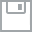
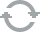
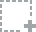
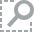
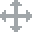
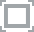
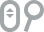
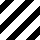
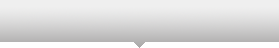
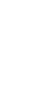
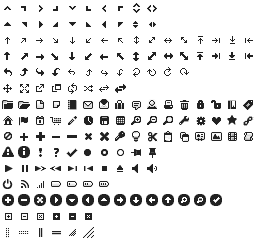
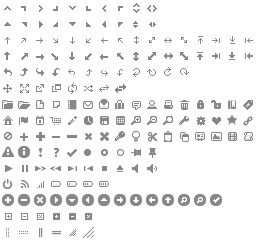
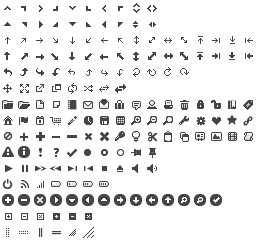
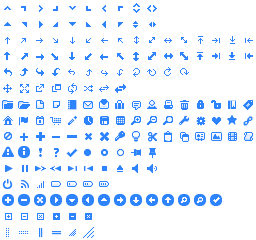
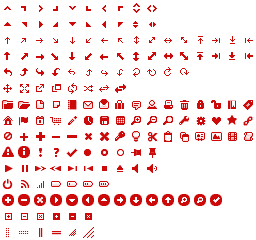
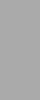
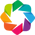
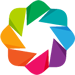

In [35]:
import requests
import pandas as pd
import numpy as np
from skimage import io
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull
import bokeh
from bokeh.plotting import figure, show, output_notebook

from IPython.display import Image, HTML, Javascript
from coffeetools import coffee
output_notebook()

> The image data that is used in this notebook is from a Flickr Photoset.  The url below is generated from the [Flickr API Explorer](https://www.flickr.com/services/api/explore/flickr.photosets.getPhotos).

In [73]:
import pandas as pd

the_json_file = 'file:///Users/Imperssonator/CC/Sherlock/scrape_figures/output.json'
df = pd.read_json(path_or_buf=the_json_file)
df['journal_label']=df.groupby('journal').grouper.labels[0]
df.columns

Index(['auth_list', 'doi', 'figCaption', 'figTitle', 'file_urls', 'files',
       'journal', 'pubDate', 'title', 'journal_label'],
      dtype='object')

In [74]:
import time
import datetime
dt = datetime.datetime.strptime(df['pubDate'][0], '%Y-%m-%d')
df['pubDate']=df['pubDate'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
df['pubDate'].head()

0   2012-08-02
1   2012-08-02
2   2012-08-02
3   2012-08-02
4   2012-08-02
Name: pubDate, dtype: datetime64[ns]

In [75]:
colors = {}
for c in df['title'].unique():
    colors[c] = np.random.random_integers( 0,255, (1,3))
    df.loc[df['title']==c,'color'] = '#' + ''.join([ '%02x'%s for s in colors[c][0]] )
    
df['color'].head()

0    #3de972
1    #3de972
2    #3de972
3    #3de972
4    #3de972
Name: color, dtype: object

In [84]:
df['files'][4]

[{'checksum': 'a8e7c8f5e0d0dcef1e10ca50b9b0b229',
  'path': 'full/ce1a116a43f6bc7dba180afff40920ca3194682a.g008',
  'url': 'http://journals.plos.org/plosone/article/figure/image?download&size=large&id=info:doi/10.1371/journal.pone.0039922.g008'}]

In [77]:
p=figure(responsive=True,x_axis_type="datetime")

# patches = []
# for c in df['class'].unique():
#     i = df.loc[df['class']==c].index.values
#     h = ConvexHull(df.iloc[i][['pca_x','pca_y']])
#     pp = p.patch(**{
#             'fill_color': df.iloc[i[0]].color,
#             'fill_alpha': .4,
#             'x': df.iloc[i].pca_x.values[h.vertices],
#             'y': df.iloc[i].pca_y.values[h.vertices],
#             'legend': c,
#         })
    
# gds=bokeh.models.ColumnDataSource(g)
# class_scale = p.oval( 
#     source=gds, 
#     x='pca_x.mean', 
#     width='pca_x.std',
#     y='pca_y.mean',
#     height='pca_y.std',
#     fill_color='color.min',
#     fill_alpha = .6,
# )

# p.add_tools(
#     bokeh.models.TapTool( 
#         renderers=[pp],
#         callback=bokeh.models.CustomJS(
#                 code=coffee.compile("""
#                 console.log 'click'
#                 """,bare=True)
#             )
#     )
# )

cds = bokeh.models.ColumnDataSource(
    df
)
# cds.data['volume_fraction'] = [ v*5 for v in cds.data['volume_fraction'] ]

circle = p.circle(
    source=cds,
    x='pubDate',
    y='journal_label',
    fill_color='color',
    size=5,
    fill_alpha=.6
)

p.add_tools(
    bokeh.models.HoverTool(
        tooltips=[
            ('title', '@title'),
        ]
    )
)

cds2 = bokeh.models.ColumnDataSource(df)
images = p.image_url(
    source=cds2,
    x='pubDate',
    y='journal_label',
    url='file_urls',
    anchor='center',
    global_alpha=.001
)

mu = [.5]
std = np.sqrt(-1*np.diff(mu)**2/(2*np.log(.2)))

p.x_range.callback = bokeh.models.CustomJS( args= {
        'x_axis': p.x_range,
        'y_axis': p.y_range,
        'images': images.glyph,
    }, 
    code=coffee.compile("""
    dx = x_axis.get('end') - x_axis.get('start')
    if dx > .0001
        images.set 'global_alpha', .001 + (.7)*Math.exp( -1*Math.pow(dx-.0001,2)/(2*Math.pow(.025,2)))
    """,bare=True)
)

In [78]:
show(p)

> Create the image source url's for the Flickr photosets and store the images in memory.

In [179]:
flickr_photo = "https://c2.staticflickr.com/{farm}/{server}/{id}_{secret}_n.jpg"
photos = {}
ct = 0
metadata = []
for index,photo in enumerate(photoset['photoset']['photo']):
    if index  < 10000:
        url = flickr_photo.format(**photo)
        photos[photo['title']] = io.imread(url)
        metadata.append(dict(url=url,**photo))
    else:
        break

df = pd.DataFrame( metadata )
df['class'] = df.title.apply( lambda s: s.split('_')[0])
df.head(3)

farm           id  isfamily  isfriend isprimary  ispublic      secret  \
0     3  12972389405         0         0         1         1  223298503d   
1     3  12972815434         0         0         0         1  734b24ef1d   
2     8  12972815804         0         0         0         1  dbbfec8f9b   

  server     title                                                url  
0   2397  15_2KX_1  https://c2.staticflickr.com/3/2397/12972389405...  
1   2689  15_2KX_6  https://c2.staticflickr.com/3/2689/12972815434...  
2   7374  15_2KX_7  https://c2.staticflickr.com/8/7374/12972815804...

In [182]:
len(df['class'].unique())

12

## The Microstructure

Titanium in-service is typically an $\alpha$-$\beta$ alloy.  The $\alpha$ is more ductile than the $\beta$ phase.

The behavior of the alloy can be modulated by changing the arrangements of the $\alpha$-$\beta$ phases.

### The Titanium Alloy Dataset

The dataset used in this notebook consists of 115 post-processed $\alpha$-$\beta$ Titanium micrographs.  The micrographs are generated from 12 different processing methods.  The processing method, usually a heat treatment process, impacts the topology of the alloy structured.

> Below is an example of each microstructure.

The images, originally grayscale, have been segmented by a domain expert into the $\alpha$ regions (**black**) and $\beta$ regions (**white**).  Some of the segmentation methods exhibit non-physical topologies.

In [203]:
gallery_table = '<table>'
for index,c in enumerate(df['class'].unique()):
    if 0 == index % 4 :
        gallery_table += '<tr>'
    gallery_table +='<td><img alt="'+c+'" src="' + df.loc[df['class'] == c,'url'].iloc[0] + '"/></td>'
    if 3 == index % 4 :
        gallery_table += '</tr>'

gallery_table += '</table>'
HTML(gallery_table)

## Pair Correlation Function

$$p( ) = \sum_{dx=0}^{L_x}{\sum_{dy=0}^{L_y}{I_{x,y}I_{x+dx,y+dy}}}$$

$$I=[0,1]$$

In [215]:
def correlation(data, max_r = 100):
    shape = data.shape
    d = (data).astype(float)
    ff = np.fft.fft2(d,s=np.array(shape)*2)
    ff = np.fft.ifft2(np.abs(np.multiply(ff,ff))).real
    xx = vector_axis( ff.shape[0] )
    yy = vector_axis( ff.shape[1] ).transpose()
    mask = np.logical_and(xx<=max_r,yy<=max_r)
    return np.fft.fftshift(ff[mask].reshape( (mask[:,0].sum(),mask[0,:].sum())))

def vector_axis( s ):
    return np.min([
        [np.arange(s)],
        [s-np.arange(s)]
    ],axis=0).transpose()

## Training Data

/Users/tfast/anaconda/lib/python3.4/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warnings.warn("Float image out of standard range; displaying "
/Users/tfast/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


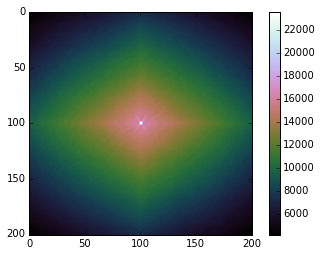

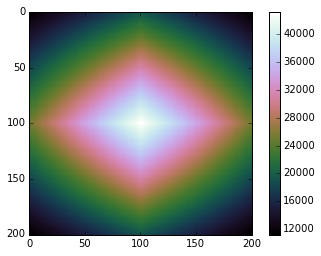

/Users/tfast/anaconda/lib/python3.4/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warnings.warn("Low image dynamic range; displaying image with "


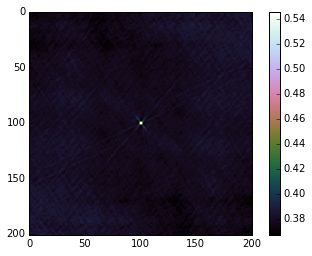

In [218]:
training = []
for index, v in df.iterrows():
    data = photos[v.title]
    numerator = correlation(data/255)
    normalization = correlation(np.ones(data.shape))
    if index == 0:
        training = np.ravel(np.divide(numerator,normalization))
        io.imshow( numerator);io.show() # Vector truths
        io.imshow( normalization );io.show() # Number of Vector samples
        io.imshow( numerator/normalization );io.show() # Spatial Correlationa
    else:
        training = np.vstack([training,np.hstack(np.divide(numerator,normalization))])

## Principal Component Analysis 

In [220]:
pca = PCA(n_components=2) 

pca_embedding = pca.fit_transform( training )

df['pca_x'] = pca_embedding[:,0] / np.sqrt((pca_embedding[:,0]**2).sum())
df['pca_y'] = pca_embedding[:,1]/ np.sqrt((pca_embedding[:,1]**2).sum())
df['volume_fraction'] = training[:,0]

In [221]:
#colors = bokeh.palettes.brewer['YlOrBr'][9]
colors = {}
for c in df['class'].unique():
    colors[c] = np.random.random_integers( 0,255, (1,3))
    df.loc[df['class']==c,'color'] = '#' + ''.join([ '%02x'%s for s in colors[c][0]] )

In [222]:
g = df.groupby('class').agg({'pca_x':['mean','std'],'pca_y':['mean','std'],'color':'min'})
g.columns = ['.'.join(col).strip() for col in g.columns.values]

* Averages of the classes - Patch and Mean 
* ~~Individual Data - Circles~~a
* Images of data - Image_url

In [234]:
p=figure(responsive=True)

patches = []
for c in df['class'].unique():
    i = df.loc[df['class']==c].index.values
    h = ConvexHull(df.iloc[i][['pca_x','pca_y']])
    pp = p.patch(**{
            'fill_color': df.iloc[i[0]].color,
            'fill_alpha': .4,
            'x': df.iloc[i].pca_x.values[h.vertices],
            'y': df.iloc[i].pca_y.values[h.vertices],
            'legend': c,
        })
    
gds=bokeh.models.ColumnDataSource(g)
class_scale = p.oval( 
    source=gds, 
    x='pca_x.mean', 
    width='pca_x.std',
    y='pca_y.mean',
    height='pca_y.std',
    fill_color='color.min',
    fill_alpha = .6,
)

p.add_tools(
    bokeh.models.TapTool( 
        renderers=[pp],
        callback=bokeh.models.CustomJS(
                code=coffee.compile("""
                console.log 'click'
                """,bare=True)
            )
    )
)

cds = bokeh.models.ColumnDataSource(
    df
)
cds.data['volume_fraction'] = [ v*5 for v in cds.data['volume_fraction'] ]

circle = p.circle(
    source=cds,
    x='pca_x',
    y='pca_y',
    fill_color='color',
    size=5,
    fill_alpha=.6
)

p.add_tools(
    bokeh.models.HoverTool(
        tooltips=[
            ('class', '@class'),
        ]
    )
)

cds2 = bokeh.models.ColumnDataSource(df)
images = p.image_url(
    source=cds2,
    x='pca_x',
    y='pca_y',
    url='url',
    anchor='center',
    global_alpha=.001
)

mu = [.5]
std = np.sqrt(-1*np.diff(mu)**2/(2*np.log(.2)))

p.x_range.callback = bokeh.models.CustomJS( args= {
        'x_axis': p.x_range,
        'y_axis': p.y_range,
        'images': images.glyph,
    }, 
    code=coffee.compile("""
    dx = x_axis.get('end') - x_axis.get('start')
    if dx > .0001
        images.set 'global_alpha', .001 + (.7)*Math.exp( -1*Math.pow(dx-.0001,2)/(2*Math.pow(.025,2)))
    """,bare=True)
)

## A reduced embedding of the Titanium Micrographs

> Scroll in and out to explore the dataset.

In [235]:
show(p)

In [107]:
HTML("""<div id="disqus_thread"></div><script type="text/javascript">(function(){var dsq = document.createElement('script'); dsq.type = 'text/javascript'; dsq.async = true; dsq.src = '//' + 'tonyfast' + '.disqus.com/embed.js';(document.getElementsByTagName('head')[0] || document.getElementsByTagName('body')[0]).appendChild(dsq);})();</script><noscript>Please enable JavaScript to view the <a href="https://disqus.com/?ref_noscript" rel="nofollow">comments powered by Disqus.</a></noscript>""")